In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
data=pd.read_csv("C:/Users/pc/Downloads/datsets/iris.csv")

In [3]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [8]:
x=data.drop("species",axis=1)
y=data["species"]
x_train,x_test,y_train,y_test=train_test_split(x,y_encoded,test_size=0.2,random_state=42)

In [27]:
knn=KNeighborsClassifier(n_neighbors=5)

In [28]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
y_pred=knn.predict(x_test)

In [30]:
accuracy=accuracy_score(y_test,y_pred)

In [31]:
print(f"accuracy:{accuracy:.2f}")

accuracy:1.00


In [32]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



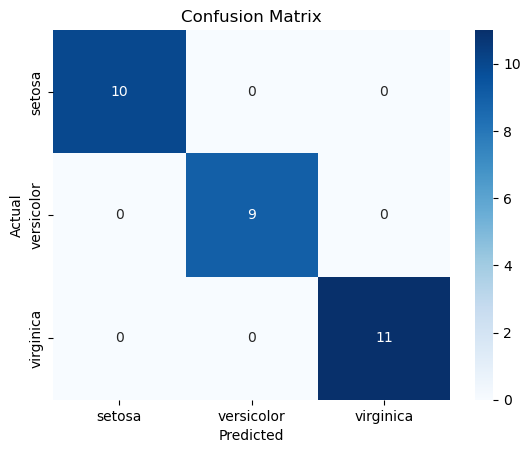

In [35]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()